## 1.Importamos las librerías necesarias.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


## 2. Crear un grafo aleatorio de 100 nodos donde cada aristas tenga 0.05 de probabilidad de pertenecer al grafo

**Sorteando una Bernoulli**

In [ ]:
# Creamos grafo vacio
g = nx.Graph()

In [ ]:
# Agregamos nodos
g.add_nodes_from(range(100))

In [ ]:
# Itero sobre todos los nodos, los llamo primer_nodo
for primer_nodo in range(100):
    # Genero la combinacion con todos los
    for segundo_nodo in range(primer_nodo + 1, 100):
        # Sorteo una binomial n = 1, p = 0.05, si genera un éxito conecto los nodos
        if np.random.binomial(1, 0.05) == 1:
            g.add_edge(primer_nodo, segundo_nodo)

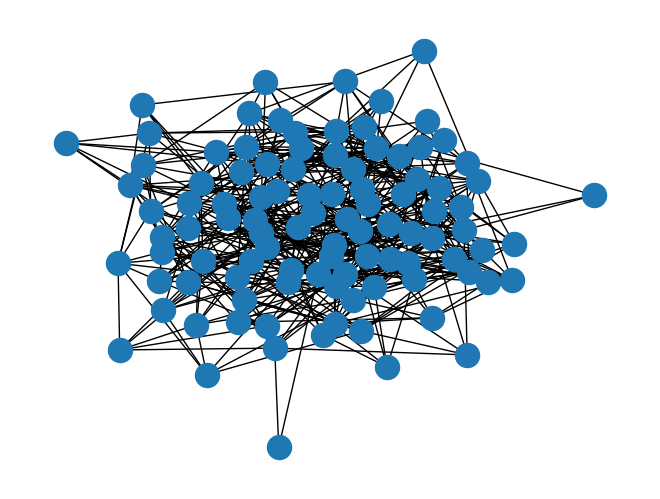

In [ ]:
nx.draw(g)

**Utilizando el modelo Erdős-Rényi**

Cada posible arista entre pares de nodos se crea de forma independiente con una probabilidad de 0.05. En promedio, cada par de nodos tiene una probabilidad del 5% de estar conectado por una arista.

In [ ]:
erdos = nx.erdos_renyi_graph(100, 0.05)

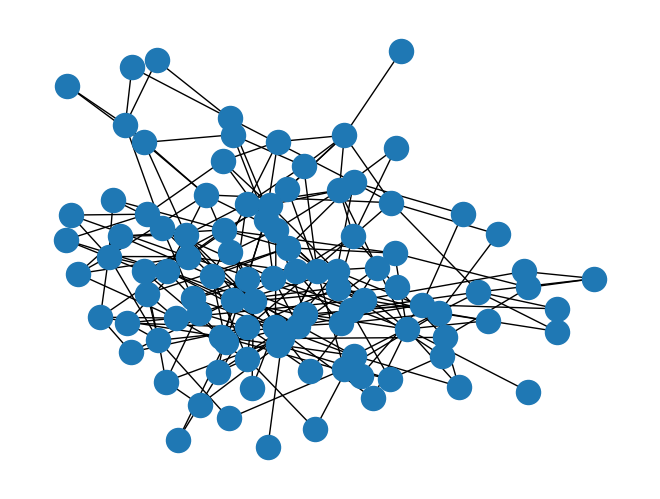

In [ ]:
nx.draw(erdos)

## 3. Obtener la matriz de adyacencia del grafo

In [ ]:
# Obtengo matriz de adyacencia
g_adj_raw = nx.adjacency_matrix(g)

# La paso a array
g_adj_array = g_adj_raw.toarray()

print(g_adj_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 4. Crear los grafos clásicos vistos en clase y graficarlos:

### a. Grafo completo

In [ ]:
g_complete = nx.complete_graph(5)

Text(0.5, 1.0, 'Grafo Completo')

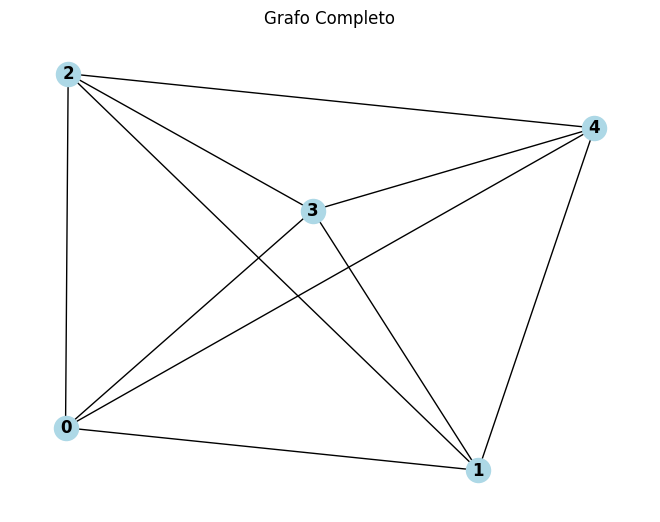

In [ ]:
nx.draw(g_complete,
        node_color='lightblue',
        with_labels=True,
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Grafo Completo")

### b. Grafo bipartito completo.

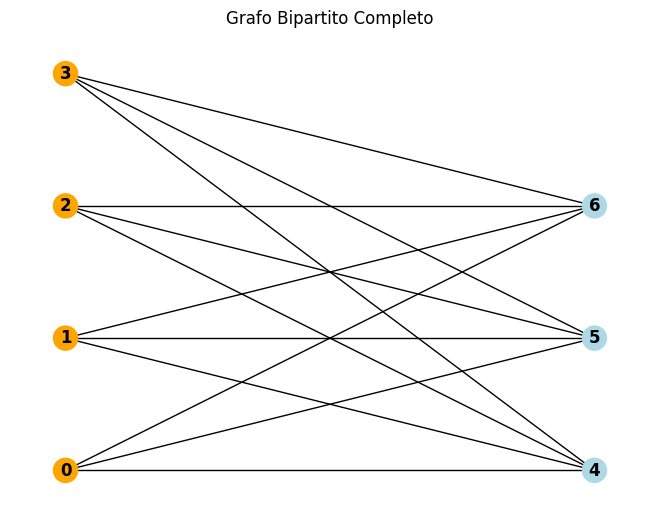

In [ ]:
n1 = 4 # 3 nodos en el primer conjunto
n2 = 3 # 4 nodos en el segundo conjunto
g_bipartite = nx.complete_bipartite_graph(n1, n2)

# Dividir los nodos en dos conjuntos bipartitos
conjunto_1 = set(range(n1))
conjunto_2 = set(range(n1, n1+n2))

# Asignar posiciones a los nodos
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(conjunto_1))
pos.update((node, (2, index)) for index, node in enumerate(conjunto_2))

# Asignar colores a los nodos de cada conjunto
colors = ['orange' if node in conjunto_1 else 'lightblue' for node in g_bipartite.nodes]

# Dibujar el grafo con colores
nx.draw(g_bipartite,
        pos=pos,
        node_color=colors,
        with_labels=True,
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Grafo Bipartito Completo")
plt.show()


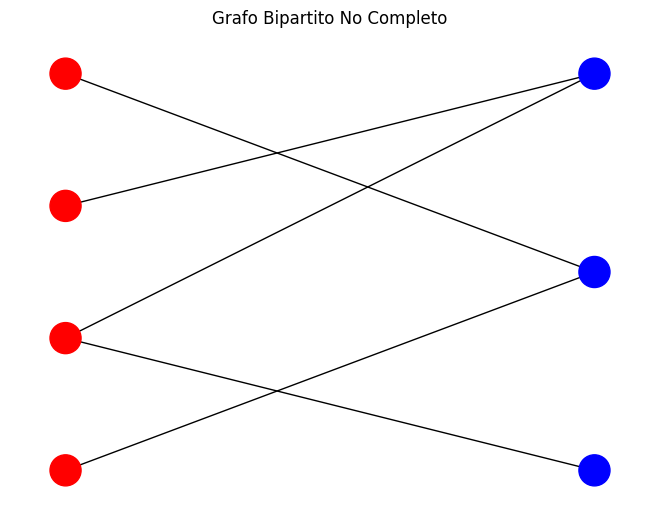

In [ ]:
# Crear un grafo vacío
g_bipartite2 = nx.Graph()

conjunto_1 = ['A', 'B', 'C', 'D']
conjunto_2 = [1, 2, 3]

# Agregar nodos al grafo
g_bipartite2.add_nodes_from(conjunto_1, bipartite=0)
g_bipartite2.add_nodes_from(conjunto_2, bipartite=1)

# Crear conexiones entre nodos (personaliza según tus necesidades)
edges = [('A', 2), ('B', 2), ('C', 1), ('C', 3), ('D', 3)]

# Agregar aristas al grafo
g_bipartite2.add_edges_from(edges)

colors = ['red' if node in conjunto_1 else 'blue' for node in g_bipartite2.nodes]

# Dibujar el grafo bipartito
pos = nx.bipartite_layout(g_bipartite2, nodes=conjunto_1)
nx.draw(g_bipartite2,
        pos=pos,
        with_labels=False,
        node_color=colors,
        node_size=500)
plt.title("Grafo Bipartito No Completo")
plt.show()


### c. Grafo arbol

In [ ]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


Text(0.5, 1.0, 'Árbol')

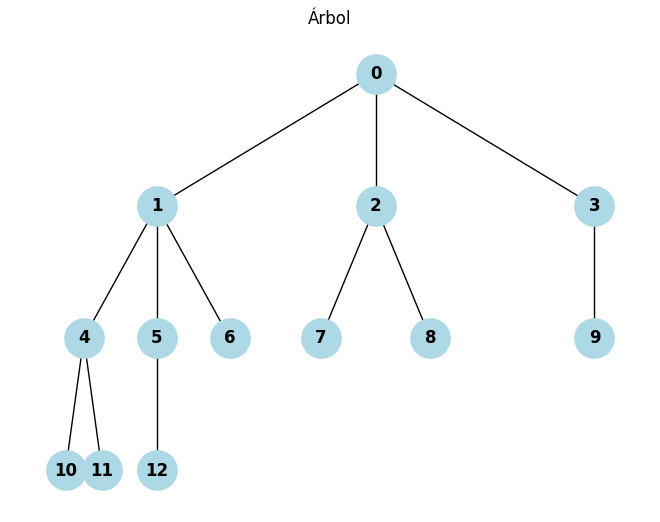

In [ ]:
tree=nx.Graph()
tree.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 8), (3, 9), (4, 10), (4, 11), (5, 12)])
pos = hierarchy_pos(tree,0) # el nodo cero será la raíz
nx.draw(tree,
        pos,
        with_labels=True,
        node_size=800,
        node_color="lightblue",
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Árbol")

### d. Grafo Regular

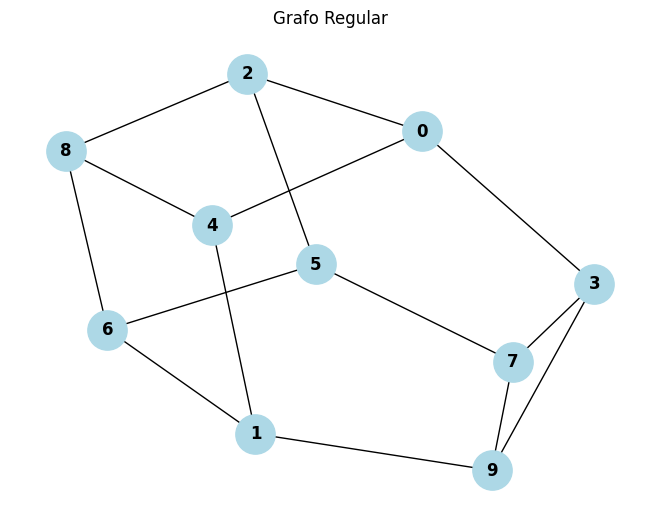

In [ ]:
# Definir el número de nodos y el grado deseado del grafo regular
n = 10  # Número de nodos
d = 3   # Grado deseado

# Crear un grafo regular
g_regular = nx.random_regular_graph(d, n)

# Visualizar el grafo
pos = nx.spring_layout(g_regular)
nx.draw(g_regular,
        pos,
        with_labels=True,
        node_size=800,
        node_color="lightblue",
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Grafo Regular")
plt.show()


### e. Grafo Ciclo

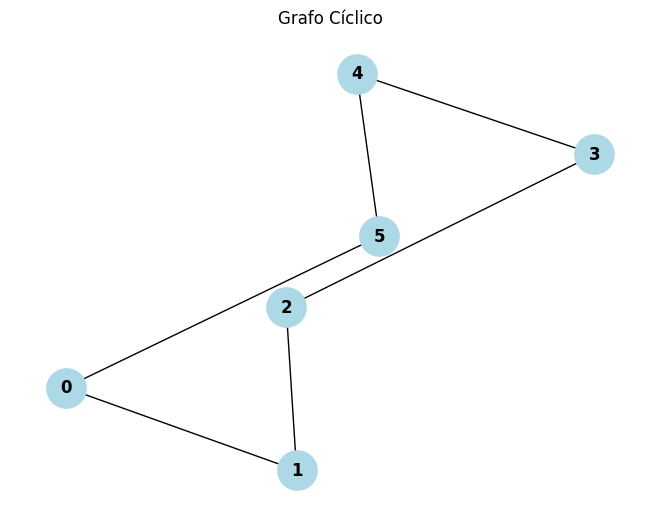

In [ ]:
# Definir el número de nodos en el grafo ciclo
n = 6

# Crear un grafo ciclo
g_cycle = nx.cycle_graph(n)

# Visualizar el grafo ciclo
pos = nx.spring_layout(g_cycle)
nx.draw(g_cycle,
        pos,
        with_labels=True,
        node_size=800,
        node_color="lightblue",
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Grafo Cíclico")
plt.show()

### f. Grafo camino

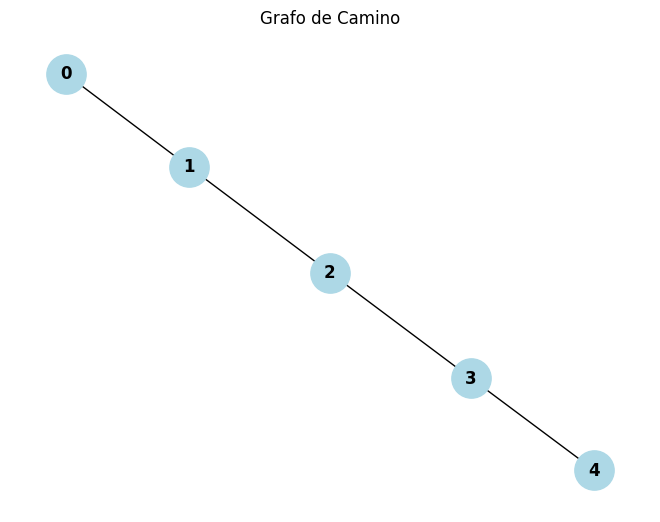

In [ ]:
# Definir el número de nodos en el grafo de camino
n = 5

# Crear un grafo de camino
g_path = nx.path_graph(n)

# Visualizar el grafo de camino
pos = nx.spring_layout(g_path)
nx.draw(g_path,
        pos,
        with_labels=True,
        node_size=800,
        node_color="lightblue",
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Grafo de Camino")
plt.show()

### f. Grafo intervalo

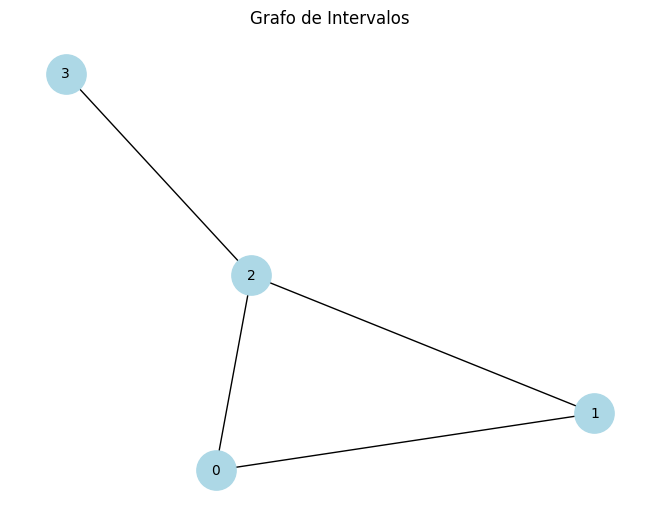

In [ ]:
# Lista de intervalos (cada intervalo se representa como una tupla (inicio, fin))
intervalos = [(1, 5), (2, 6), (4, 8), (7, 10)]

# Creamos un grafo vacío
g_interval = nx.Graph()

# Agregamos nodos al grafo para representar los intervalos
for i, intervalo in enumerate(intervalos):
    g_interval.add_node(i, intervalo=intervalo)

# Agregamos aristas entre los nodos si los intervalos se intersectan
for i in range(len(intervalos)):
    for j in range(i + 1, len(intervalos)):
        intervalo_i = intervalos[i]
        intervalo_j = intervalos[j]
        if intervalo_i[1] >= intervalo_j[0]: #and intervalo_j[1] >= intervalo_i[0]: # Alcanza con la primera condición?
            g_interval.add_edge(i, j)

# Dibujar el grafo de intervalo
pos = nx.spring_layout(g_interval)
nx.draw(g_interval,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=800,
        font_size=10,
        font_color='black'
        )
plt.title("Grafo de Intervalos")
plt.show()


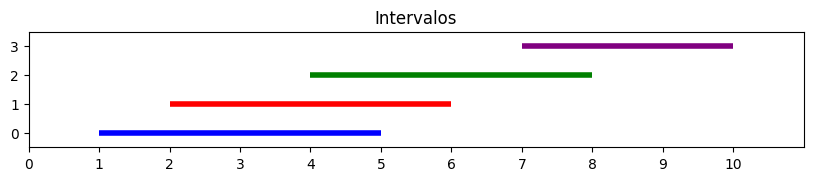

In [ ]:
# Definir los extremos de los intervalos
intervalo_1 = (1, 5)
intervalo_2 = (2, 6)
intervalo_3 = (4, 8)
intervalo_4 = (7, 10)

# Tamaño personalizado de la figura
plt.figure(figsize=(10, 1.5))

# Crear un eje
ax = plt.gca()

# Dibujar los intervalos como líneas horizontales
ax.hlines(y=1, xmin=intervalo_1[0], xmax=intervalo_1[1], color='blue', linewidth=4, label='0')
ax.hlines(y=2, xmin=intervalo_2[0], xmax=intervalo_2[1], color='red', linewidth=4, label='1')
ax.hlines(y=3, xmin=intervalo_3[0], xmax=intervalo_3[1], color='green', linewidth=4, label='2')
ax.hlines(y=4, xmin=intervalo_4[0], xmax=intervalo_4[1], color='purple', linewidth=4, label='3')

# Configurar el eje y etiquetas
valores_x = np.arange(0, 11)
ax.set_xticks(valores_x)
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['0', '1', '2', '3'])
ax.set_xlim(0, 11)
ax.set_ylim(0.5, 4.5)
# ax.legend()

# Mostrar el gráfico
plt.title("Intervalos")
plt.show()


## 5. Para cada grafo del punto anterior calcular

*   Diámetro
*   Radio
*   Vértices centrales
*   Cantidad de componentes principales



In [ ]:
# Diámetro
diameter_complete = nx.diameter(g_complete)
diameter_bipartite = nx.diameter(g_bipartite)
diameter_tree = nx.diameter(tree)
diameter_regular = nx.diameter(g_regular)
diameter_cycle = nx.diameter(g_cycle)
diameter_path = nx.diameter(g_path)
diameter_interval = nx.diameter(g_interval)

In [ ]:
# Radio
radius_complete = nx.radius(g_complete)
radius_bipartite = nx.radius(g_bipartite)
radius_tree = nx.radius(tree)
radius_regular = nx.radius(g_regular)
radius_cycle = nx.radius(g_cycle)
radius_path = nx.radius(g_path)
radius_interval = nx.radius(g_interval)

In [ ]:
# Vértices centrales
center_complete = nx.center(g_complete)
center_bipartite = nx.center(g_bipartite)
center_tree = nx.center(tree)
center_regular = nx.center(g_regular)
center_cycle = nx.center(g_cycle)
center_path = nx.center(g_path)
center_interval = nx.center(g_interval)

In [ ]:
# Cantidad de componentes conexas
conncomp_complete = nx.number_connected_components(g_complete)
conncomp_bipartite = nx.number_connected_components(g_bipartite)
conncomp_tree = nx.number_connected_components(tree)
conncomp_regular = nx.number_connected_components(g_regular)
conncomp_cycle = nx.number_connected_components(g_cycle)
conncomp_path = nx.number_connected_components(g_path)
conncomp_interval = nx.number_connected_components(g_interval)

In [ ]:
variables = ['Completo', 'Bipartito', 'Árbol', 'Regular', 'Ciclo', 'Camino', 'Intervalo']
metrica1 = [diameter_complete, diameter_bipartite, diameter_tree, diameter_regular, diameter_cycle, diameter_path, diameter_interval]
metrica2 = [radius_complete, radius_bipartite, radius_tree, radius_regular, radius_cycle, radius_path, radius_interval]
metrica3 = [center_complete, center_bipartite, center_tree, center_regular, center_cycle, center_path, center_interval]
metrica4 = [conncomp_complete, conncomp_bipartite, conncomp_tree, conncomp_regular, conncomp_cycle, conncomp_path, conncomp_interval]


data = {
    'Diámetro': metrica1,
    'Radio': metrica2,
    'V Centrales': metrica3,
    'Cant. Comp. Conexas': metrica4
    }

df = pd.DataFrame(data, index=variables)
display(df)


,Diámetro,Radio,V Centrales,Cant. Comp. Conexas
Completo,1,1,"[0, 1, 2, 3, 4]",1
Bipartito,2,2,"[0, 1, 2, 3, 4, 5, 6]",1
Árbol,5,3,"[0, 1]",1
Regular,3,3,"[0, 4, 3, 7, 6, 8, 5, 1, 9, 2]",1
Ciclo,3,3,"[0, 1, 2, 3, 4, 5]",1
Camino,4,2,[2],1
Intervalo,2,1,[2],1


La **excentricidad** es la máxima distancia de un nodo con respecto a cualquier otro nodo del grafo.

Si calculamos la excentricidad de cada nodo de nuestro grafo, el **radio** será el valor mínimo, mientras que el **diámetro** será el valor máximo.

Los **vértices centrales** son aquellos vértices que tienen la menor suma de distancias a todos los demás nodos en el grafo, es decir, son los más cercanos a todos los demás nodos en términos de longitud de camino.

*Diámetro, Radio y Centralidad.*
- **Completo**: Al estar todos los nodos conectados entre sí, el diámetro y el radio siempre será 1. Por esta razón, todos los vértices del grafo serán centrales.
- **Bipartito**: Al ser un bipartito completo, la excentricidad de todos los nodos será 2, que es el camino necesario para ir de un nodo del primer tipo a otro del mismo tipo (debe pasar antes por uno del tipo contrario). Es por este motivo que tanto diámetro como radio son igual a 2 y todos los nodos del grafo serán centrales.
- **Árbol**: Por la cantidad de ramas y niveles con que fue diseñado, si consideramos ir del nodo más profundo de la rama más a la izquierda al nodo más profundo de la rama más a la derecha debemos atraversar 5 nodos, alcanzando el diámetro del grafo. Por el lado del radio, al contar con un mínimo de tres niveles de profundidad, el radio será de 3.
Si evaluamos centralidad, por motivos obvio, el nodo raíz 0, el de nuestro primer nivel estará entre los nodos centrales. A este nodo se suma el nodo 1, que se ubica en el siguiente nivel de profundidad y desde el cual se desprende la mayor ramificación de nuestro árbol.
- **Regular**: En el grafo regular, el diámetro y radio dependerán del grado definido. A mayor grado, más conexiones y, por lo tanto, menor diámetro y radio.
Teniendo en cuenta que todos los nodos tienen la misma excentricidad (en nuestro caso 3), todos serán catalogados como nodos centrales.
- **Ciclo**: Es como un grafo regular de grado 1. Teniendo en cuenta que queda formado una especie de círculo, el diámetro y radio del grafo será igual a la mitad de la cantidad de nodos que posee y todos los vértices serán centrales.
- **Camino**: Por la forma en la que diseñamos el grafo camino, el diámetro estará dado por la excentricidad de los nodos iniciales y el radio por la excentricidad del nodo (o los nodos en caso de ser dos) ubicado en el medio del camino. Estos vértices que se encuentran en el medio del camino serán los nodos centrales.
- **Intervalo**: El diámetro y radio dependerá del nivel de solapamiento de los intervalos, ya que esto define las conexiones entre los nodos. En nuestro caso, el intervalo/vértice 2 se superpone con el resto de los intervalos, siendo el nodo central y el que define el diámetro de nuestro grafo.

*Componentes conexas.*

Por como fueron diseñados los distintos grafos, todos se componen de una única componente conexa.

El único caso que presenta dos componentes conexas es el grafo bipartito no completo que armamos adrede anteriormente.

## 6. Para cada grafo del punto 4:

*   Recorrer el grafo con DFS.
*   Recorrer el grafo con BFS.
*   Calcular el MST.
*   Calcular todos los caminos minimos entre pares de ejes.





In [ ]:
# Definimos al nodo 0 como el inicio de nuestros recorridos.
inicio = 0

### DFS - Depth First Search

In [ ]:
dfs_complete = list(nx.dfs_tree(g_complete, source=inicio))
dfs_bipartite = list(nx.dfs_tree(g_bipartite, source=inicio))
dfs_tree = list(nx.dfs_tree(tree, source=inicio))
dfs_regular = list(nx.dfs_tree(g_regular, source=inicio))
dfs_cycle = list(nx.dfs_tree(g_cycle, source=inicio))
dfs_path = list(nx.dfs_tree(g_path, source=inicio))
dfs_interval = list(nx.dfs_tree(g_interval, source=inicio))

In [ ]:
print(f"El DFS del grafo completo es {dfs_complete} ")
print(f"El DFS del grafo bipartito es {dfs_bipartite} ")
print(f"El DFS del árbol es {dfs_tree} ")
print(f"El DFS del grafo regular es {dfs_regular} ")
print(f"El DFS del grafo ciclo es {dfs_cycle} ")
print(f"El DFS del grafo camino es {dfs_path} ")
print(f"El DFS del grafo intervalo es {dfs_interval} ")

El DFS del grafo completo es [0, 1, 2, 3, 4] 
El DFS del grafo bipartito es [0, 4, 1, 5, 2, 6, 3] 
El DFS del árbol es [0, 1, 4, 10, 11, 5, 12, 6, 2, 7, 8, 3, 9] 
El DFS del grafo regular es [0, 4, 1, 6, 8, 2, 5, 7, 3, 9] 
El DFS del grafo ciclo es [0, 1, 2, 3, 4, 5] 
El DFS del grafo camino es [0, 1, 2, 3, 4] 
El DFS del grafo intervalo es [0, 1, 2, 3] 


### BFS - Breadth First Search

In [ ]:
bfs_complete = list(nx.bfs_tree(g_complete, source=inicio))
bfs_bipartite = list(nx.bfs_tree(g_bipartite, source=inicio))
bfs_tree = list(nx.bfs_tree(tree, source=inicio))
bfs_regular = list(nx.bfs_tree(g_regular, source=inicio))
bfs_cycle = list(nx.bfs_tree(g_cycle, source=inicio))
bfs_path = list(nx.bfs_tree(g_path, source=inicio))
bfs_interval = list(nx.bfs_tree(g_interval, source=inicio))

In [ ]:
print(f"El BFS del grafo completo es {bfs_complete} ")
print(f"El BFS del grafo bipartito es {bfs_bipartite} ")
print(f"El BFS del árbol es {bfs_tree} ")
print(f"El BFS del grafo regular es {bfs_regular} ")
print(f"El BFS del grafo ciclo es {bfs_cycle} ")
print(f"El BFS del grafo camino es {bfs_path} ")
print(f"El BFS del grafo intervalo es {bfs_interval} ")

El BFS del grafo completo es [0, 1, 2, 3, 4] 
El BFS del grafo bipartito es [0, 4, 5, 6, 1, 2, 3] 
El BFS del árbol es [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
El BFS del grafo regular es [0, 4, 3, 2, 1, 8, 7, 9, 5, 6] 
El BFS del grafo ciclo es [0, 1, 5, 2, 4, 3] 
El BFS del grafo camino es [0, 1, 2, 3, 4] 
El BFS del grafo intervalo es [0, 1, 2, 3] 


### MST - Minimum Spanning Tree

**MST** es el árbol de expansión mínima, es decir, el subconjunto de aristas que conecta todos los nodos del grafo de manera que se minimice la suma de los pesos de las aristas. La solución siempre es un árbol (un grafo con todos los nodos conectados y sin ciclos) que permite llegar a todos los nodos con la menor suma de pesos.

Esperamos obtener un árbol con la misma cantidad de nodos, pero igual o menor cantidad de aristas.

In [ ]:
mst_complete = nx.minimum_spanning_tree(g_complete)
mst_bipartite = nx.minimum_spanning_tree(g_bipartite)
mst_tree = nx.minimum_spanning_tree(tree)
mst_regular = nx.minimum_spanning_tree(g_regular)
mst_cycle = nx.minimum_spanning_tree(g_cycle)
mst_path = nx.minimum_spanning_tree(g_path)
mst_interval = nx.minimum_spanning_tree(g_interval)

In [ ]:
print(f"El MST del grafo completo es: {mst_complete} ")
print(f"El MST del grafo bipartito es: {mst_bipartite} ")
print(f"El MST del árbol es: {mst_tree} ")
print(f"El MST del grafo regular es: {mst_regular} ")
print(f"El MST del grafo ciclo es: {mst_cycle} ")
print(f"El MST del grafo camino es: {mst_path} ")
print(f"El MST del grafo intervalo es: {mst_interval} ")

El MST del grafo completo es: Graph with 5 nodes and 4 edges 
El MST del grafo bipartito es: Graph named 'complete_bipartite_graph(4, 3)' with 7 nodes and 6 edges 
El MST del árbol es: Graph with 13 nodes and 12 edges 
El MST del grafo regular es: Graph with 10 nodes and 9 edges 
El MST del grafo ciclo es: Graph with 6 nodes and 5 edges 
El MST del grafo camino es: Graph with 5 nodes and 4 edges 
El MST del grafo intervalo es: Graph with 4 nodes and 3 edges 


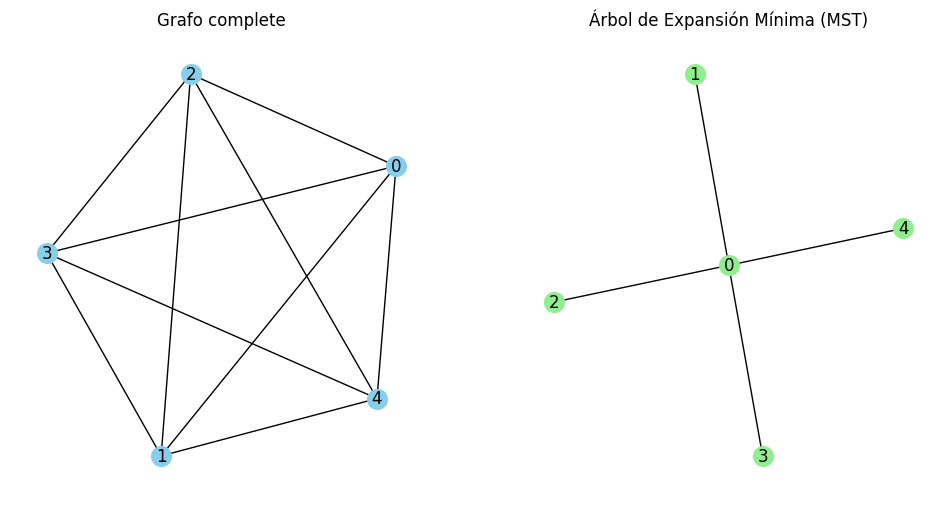

In [ ]:
# Dibujar el grafo original y el MST
pos = nx.spring_layout(g_complete)
pos_mst = nx.spring_layout(mst_complete)

plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(g_complete, pos, with_labels=True, node_size=200, node_color='skyblue')
plt.title('Grafo complete')

plt.subplot(122)
nx.draw(mst_complete, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

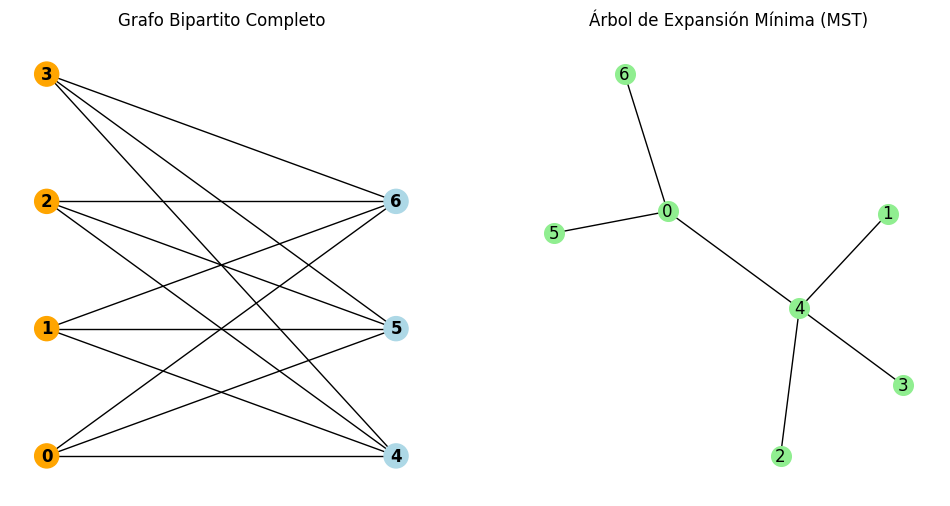

In [ ]:
# Dibujar el grafo original y el MST

plt.figure(figsize=(12, 6))
plt.subplot(121)
n1 = 4 # 3 nodos en el primer conjunto
n2 = 3 # 4 nodos en el segundo conjunto
g_bipartite = nx.complete_bipartite_graph(n1, n2)

# Dividir los nodos en dos conjuntos bipartitos
conjunto_1 = set(range(n1))
conjunto_2 = set(range(n1, n1+n2))

# Asignar posiciones a los nodos
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(conjunto_1))
pos.update((node, (2, index)) for index, node in enumerate(conjunto_2))

# Asignar colores a los nodos de cada conjunto
colors = ['orange' if node in conjunto_1 else 'lightblue' for node in g_bipartite.nodes]

# Dibujar el grafo con colores
nx.draw(g_bipartite,
        pos=pos,
        node_color=colors,
        with_labels=True,
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title("Grafo Bipartito Completo")


plt.subplot(122)
pos_mst = nx.spring_layout(mst_bipartite)
nx.draw(mst_bipartite, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

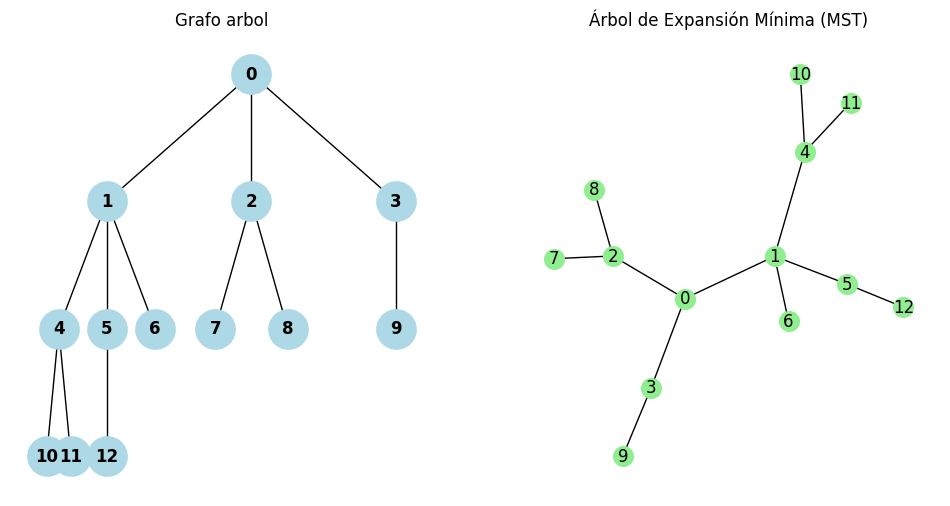

In [ ]:
# Dibujar el grafo original y el MST
plt.figure(figsize=(12, 6))

plt.subplot(121)
tree=nx.Graph()
tree.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 8), (3, 9), (4, 10), (4, 11), (5, 12)])
pos = hierarchy_pos(tree,0) # el nodo cero será la raíz
nx.draw(tree,
        pos,
        with_labels=True,
        node_size=800,
        node_color="lightblue",
        font_size=12,
        font_color="black",
        font_weight="bold"
        )
plt.title('Grafo arbol')

plt.subplot(122)
pos_mst = nx.spring_layout(mst_tree)
nx.draw(mst_tree, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

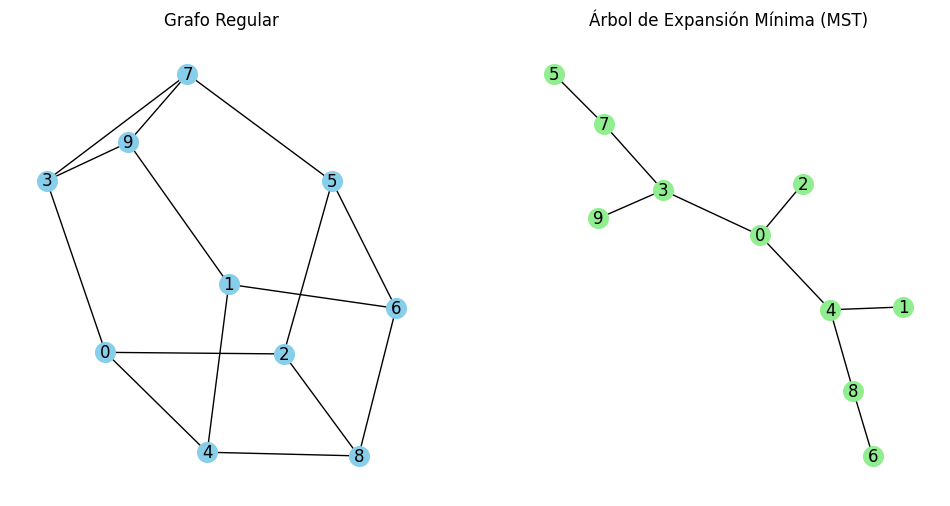

In [ ]:
# Dibujar el grafo original y el MST
pos = nx.spring_layout(g_regular)  # Posiciones de los nodos para el grafo original
pos_mst = nx.spring_layout(mst_regular)    # Posiciones de los nodos para el MST

plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(g_regular, pos, with_labels=True, node_size=200, node_color='skyblue')
plt.title('Grafo Regular')

plt.subplot(122)
nx.draw(mst_regular, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

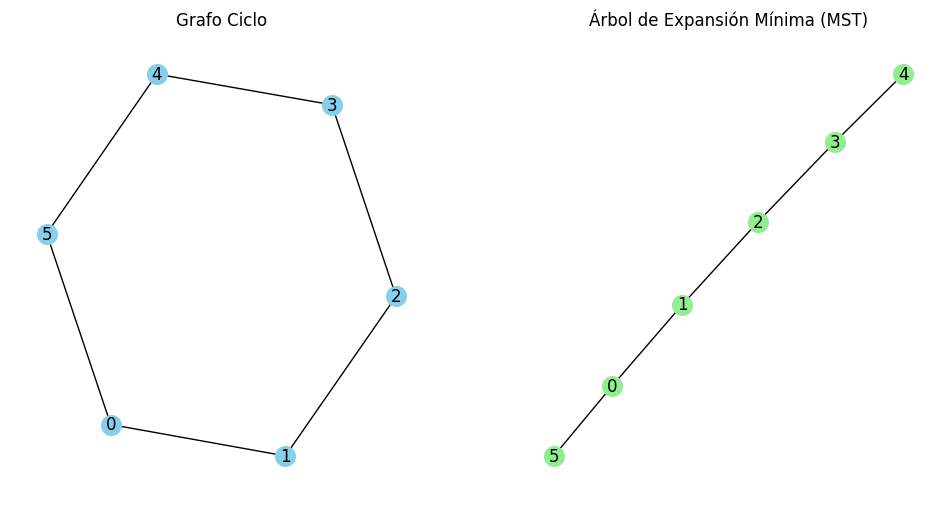

In [ ]:
# Dibujar el grafo original y el MST
pos = nx.spring_layout(g_cycle)
pos_mst = nx.spring_layout(mst_cycle)

plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(g_cycle, pos, with_labels=True, node_size=200, node_color='skyblue')
plt.title('Grafo Ciclo')

plt.subplot(122)
nx.draw(mst_cycle, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

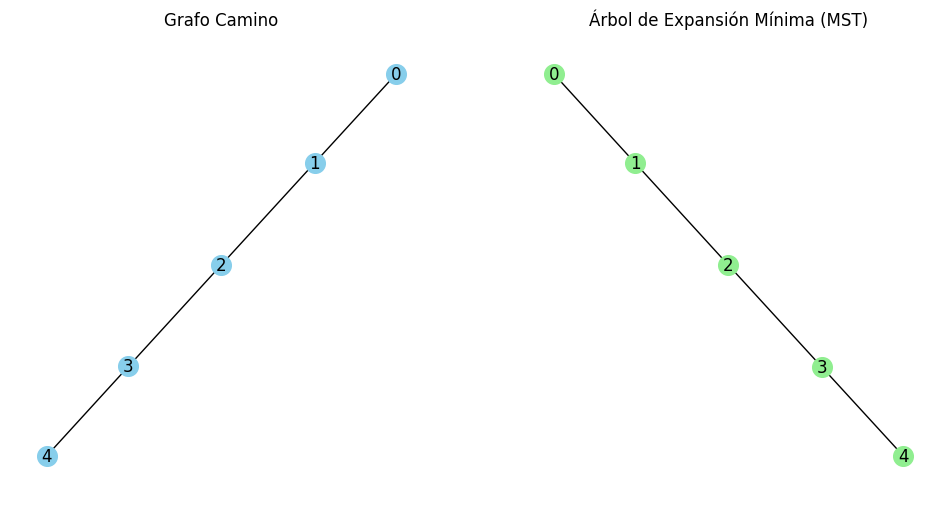

In [ ]:
# Dibujar el grafo original y el MST
pos = nx.spring_layout(g_path)
pos_mst = nx.spring_layout(mst_path)

plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(g_path, pos, with_labels=True, node_size=200, node_color='skyblue')
plt.title('Grafo Camino')

plt.subplot(122)
nx.draw(mst_path, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

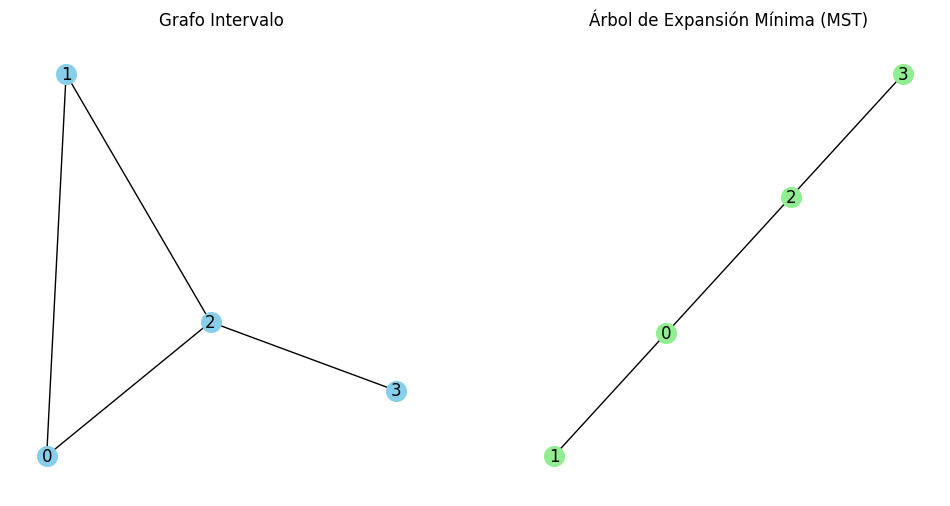

In [ ]:
# Dibujar el grafo original y el MST
pos = nx.spring_layout(g_interval)
pos_mst = nx.spring_layout(mst_interval)

plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(g_interval, pos, with_labels=True, node_size=200, node_color='skyblue')
plt.title('Grafo Intervalo')

plt.subplot(122)
nx.draw(mst_interval, pos_mst, with_labels=True, node_size=200, node_color='lightgreen')
plt.title('Árbol de Expansión Mínima (MST)')

plt.show()

### Calcular todos los caminos mínimos entre todos los pares de ejes.

*   **Completo**: al estar todos los nodos conectados entre sí, el camino más corto siempre será de longitud 1.
*   **Bipartito**: El camino más corto será de longitud 1 entre nodos de distinto tipo y de 2 entre nodos del mismo tipo, ya que deben pasar antes un nodo del tipo contrario.
*   **Árbol**: Dependerá de la estructura del árbol y del nodo de inicio y fin.
*   **Regular**: Cuanto mayor sea el grado de nuestro grafo regular, mayor cantidad de conexiones entre los nodos y menor la longitud del camino mínimo encontrado.
*   **Ciclo**: La longitud máxima sería igual a la mitad (parte entera) de la cantidad de nodos de nuestro grafo.
*   **Camino**: Por el diseño de nuestro grafo camino, la longitud máxima la encontramos cuando queremos conectar las puntas del camino.
*   **Intervalo**: Dependerá de la estructura del árbol y del nodo de inicio y fin.





In [ ]:
shortest_complete = dict(nx.all_pairs_shortest_path(g_complete))
shortest_bipartite = dict(nx.all_pairs_shortest_path(g_bipartite))
shortest_tree = dict(nx.all_pairs_shortest_path(tree))
shortest_regular = dict(nx.all_pairs_shortest_path(g_regular))
shortest_cycle = dict(nx.all_pairs_shortest_path(g_cycle))
shortest_gpath = dict(nx.all_pairs_shortest_path(g_path))
shortest_interval = dict(nx.all_pairs_shortest_path(g_interval))


In [ ]:
print("Grafo Completo")
for source_node in shortest_complete:
    for target_node, shortest_path in shortest_complete[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")


Grafo Completo
El camino más corto desde 0 hacia 1 es: [0, 1] con una longitud de 1
El camino más corto desde 0 hacia 2 es: [0, 2] con una longitud de 1
El camino más corto desde 0 hacia 3 es: [0, 3] con una longitud de 1
El camino más corto desde 0 hacia 4 es: [0, 4] con una longitud de 1
El camino más corto desde 1 hacia 0 es: [1, 0] con una longitud de 1
El camino más corto desde 1 hacia 2 es: [1, 2] con una longitud de 1
El camino más corto desde 1 hacia 3 es: [1, 3] con una longitud de 1
El camino más corto desde 1 hacia 4 es: [1, 4] con una longitud de 1
El camino más corto desde 2 hacia 0 es: [2, 0] con una longitud de 1
El camino más corto desde 2 hacia 1 es: [2, 1] con una longitud de 1
El camino más corto desde 2 hacia 3 es: [2, 3] con una longitud de 1
El camino más corto desde 2 hacia 4 es: [2, 4] con una longitud de 1
El camino más corto desde 3 hacia 0 es: [3, 0] con una longitud de 1
El camino más corto desde 3 hacia 1 es: [3, 1] con una longitud de 1
El camino más corto

In [ ]:
print("Grafo Bipartito")
for source_node in shortest_bipartite:
    for target_node, shortest_path in shortest_bipartite[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")

Grafo Bipartito
El camino más corto desde 0 hacia 4 es: [0, 4] con una longitud de 1
El camino más corto desde 0 hacia 5 es: [0, 5] con una longitud de 1
El camino más corto desde 0 hacia 6 es: [0, 6] con una longitud de 1
El camino más corto desde 0 hacia 1 es: [0, 4, 1] con una longitud de 2
El camino más corto desde 0 hacia 2 es: [0, 4, 2] con una longitud de 2
El camino más corto desde 0 hacia 3 es: [0, 4, 3] con una longitud de 2
El camino más corto desde 1 hacia 4 es: [1, 4] con una longitud de 1
El camino más corto desde 1 hacia 5 es: [1, 5] con una longitud de 1
El camino más corto desde 1 hacia 6 es: [1, 6] con una longitud de 1
El camino más corto desde 1 hacia 0 es: [1, 4, 0] con una longitud de 2
El camino más corto desde 1 hacia 2 es: [1, 4, 2] con una longitud de 2
El camino más corto desde 1 hacia 3 es: [1, 4, 3] con una longitud de 2
El camino más corto desde 2 hacia 4 es: [2, 4] con una longitud de 1
El camino más corto desde 2 hacia 5 es: [2, 5] con una longitud de 1


In [ ]:
print("Grafo Arbol")
for source_node in shortest_tree:
    for target_node, shortest_path in shortest_tree[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")

Grafo Arbol
El camino más corto desde 0 hacia 1 es: [0, 1] con una longitud de 1
El camino más corto desde 0 hacia 2 es: [0, 2] con una longitud de 1
El camino más corto desde 0 hacia 3 es: [0, 3] con una longitud de 1
El camino más corto desde 0 hacia 4 es: [0, 1, 4] con una longitud de 2
El camino más corto desde 0 hacia 5 es: [0, 1, 5] con una longitud de 2
El camino más corto desde 0 hacia 6 es: [0, 1, 6] con una longitud de 2
El camino más corto desde 0 hacia 7 es: [0, 2, 7] con una longitud de 2
El camino más corto desde 0 hacia 8 es: [0, 2, 8] con una longitud de 2
El camino más corto desde 0 hacia 9 es: [0, 3, 9] con una longitud de 2
El camino más corto desde 0 hacia 10 es: [0, 1, 4, 10] con una longitud de 3
El camino más corto desde 0 hacia 11 es: [0, 1, 4, 11] con una longitud de 3
El camino más corto desde 0 hacia 12 es: [0, 1, 5, 12] con una longitud de 3
El camino más corto desde 1 hacia 0 es: [1, 0] con una longitud de 1
El camino más corto desde 1 hacia 4 es: [1, 4] co

In [ ]:
print("Grafo Regular")
for source_node in shortest_regular:
    for target_node, shortest_path in shortest_regular[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")

Grafo Regular
El camino más corto desde 0 hacia 4 es: [0, 4] con una longitud de 1
El camino más corto desde 0 hacia 3 es: [0, 3] con una longitud de 1
El camino más corto desde 0 hacia 2 es: [0, 2] con una longitud de 1
El camino más corto desde 0 hacia 1 es: [0, 4, 1] con una longitud de 2
El camino más corto desde 0 hacia 8 es: [0, 4, 8] con una longitud de 2
El camino más corto desde 0 hacia 7 es: [0, 3, 7] con una longitud de 2
El camino más corto desde 0 hacia 9 es: [0, 3, 9] con una longitud de 2
El camino más corto desde 0 hacia 5 es: [0, 2, 5] con una longitud de 2
El camino más corto desde 0 hacia 6 es: [0, 4, 1, 6] con una longitud de 3
El camino más corto desde 4 hacia 0 es: [4, 0] con una longitud de 1
El camino más corto desde 4 hacia 1 es: [4, 1] con una longitud de 1
El camino más corto desde 4 hacia 8 es: [4, 8] con una longitud de 1
El camino más corto desde 4 hacia 3 es: [4, 0, 3] con una longitud de 2
El camino más corto desde 4 hacia 2 es: [4, 0, 2] con una longitu

In [ ]:
print("Grafo Ciclo")
for source_node in shortest_cycle:
    for target_node, shortest_path in shortest_cycle[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")

Grafo Ciclo
El camino más corto desde 0 hacia 1 es: [0, 1] con una longitud de 1
El camino más corto desde 0 hacia 5 es: [0, 5] con una longitud de 1
El camino más corto desde 0 hacia 2 es: [0, 1, 2] con una longitud de 2
El camino más corto desde 0 hacia 4 es: [0, 5, 4] con una longitud de 2
El camino más corto desde 0 hacia 3 es: [0, 1, 2, 3] con una longitud de 3
El camino más corto desde 1 hacia 0 es: [1, 0] con una longitud de 1
El camino más corto desde 1 hacia 2 es: [1, 2] con una longitud de 1
El camino más corto desde 1 hacia 5 es: [1, 0, 5] con una longitud de 2
El camino más corto desde 1 hacia 3 es: [1, 2, 3] con una longitud de 2
El camino más corto desde 1 hacia 4 es: [1, 0, 5, 4] con una longitud de 3
El camino más corto desde 2 hacia 1 es: [2, 1] con una longitud de 1
El camino más corto desde 2 hacia 3 es: [2, 3] con una longitud de 1
El camino más corto desde 2 hacia 0 es: [2, 1, 0] con una longitud de 2
El camino más corto desde 2 hacia 4 es: [2, 3, 4] con una longit

In [ ]:
print("Grafo Camino")
for source_node in shortest_gpath:
    for target_node, shortest_path in shortest_gpath[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")

Grafo Camino
El camino más corto desde 0 hacia 1 es: [0, 1] con una longitud de 1
El camino más corto desde 0 hacia 2 es: [0, 1, 2] con una longitud de 2
El camino más corto desde 0 hacia 3 es: [0, 1, 2, 3] con una longitud de 3
El camino más corto desde 0 hacia 4 es: [0, 1, 2, 3, 4] con una longitud de 4
El camino más corto desde 1 hacia 0 es: [1, 0] con una longitud de 1
El camino más corto desde 1 hacia 2 es: [1, 2] con una longitud de 1
El camino más corto desde 1 hacia 3 es: [1, 2, 3] con una longitud de 2
El camino más corto desde 1 hacia 4 es: [1, 2, 3, 4] con una longitud de 3
El camino más corto desde 2 hacia 1 es: [2, 1] con una longitud de 1
El camino más corto desde 2 hacia 3 es: [2, 3] con una longitud de 1
El camino más corto desde 2 hacia 0 es: [2, 1, 0] con una longitud de 2
El camino más corto desde 2 hacia 4 es: [2, 3, 4] con una longitud de 2
El camino más corto desde 3 hacia 2 es: [3, 2] con una longitud de 1
El camino más corto desde 3 hacia 4 es: [3, 4] con una lo

In [ ]:
print("Grafo Intervalo")
for source_node in shortest_interval:
    for target_node, shortest_path in shortest_interval[source_node].items():
        if source_node != target_node:
            print(f"El camino más corto desde {source_node} hacia {target_node} es: {shortest_path} con una longitud de {len(shortest_path) - 1}")

Grafo Intervalo
El camino más corto desde 0 hacia 1 es: [0, 1] con una longitud de 1
El camino más corto desde 0 hacia 2 es: [0, 2] con una longitud de 1
El camino más corto desde 0 hacia 3 es: [0, 2, 3] con una longitud de 2
El camino más corto desde 1 hacia 0 es: [1, 0] con una longitud de 1
El camino más corto desde 1 hacia 2 es: [1, 2] con una longitud de 1
El camino más corto desde 1 hacia 3 es: [1, 2, 3] con una longitud de 2
El camino más corto desde 2 hacia 0 es: [2, 0] con una longitud de 1
El camino más corto desde 2 hacia 1 es: [2, 1] con una longitud de 1
El camino más corto desde 2 hacia 3 es: [2, 3] con una longitud de 1
El camino más corto desde 3 hacia 2 es: [3, 2] con una longitud de 1
El camino más corto desde 3 hacia 0 es: [3, 2, 0] con una longitud de 2
El camino más corto desde 3 hacia 1 es: [3, 2, 1] con una longitud de 2


## 7. Se tiene un tablero de ajedrez de NxN con algunas casillas inutilizables y se quieren colocar la mayor cantidad posibles de torres de tal manera que no se ataquen entre sí (una torre ataca toda la fila y columna en la que se encuentra presente). Resolver el problema utilizando el problema de Maximum Flow.

Debemos modelar algunas restricciones en nuestro grafo:

Solo se permite una torre por fila y una torre por columna, de manera tal que no se puedan atacar entre sí.
Esto nos lleva a definir en las distintas aristas del grafo una capacidad máxima de uno.

*   Desde nuestro **nodo fuente (Source)** solo se podrán enviar un máximo de una torre hacia cada nodo Fila.
*   Estos **nodos Fila** solo podrán enviar una única torre a alguno de los nodos Columna (todos interconectados).
*   Los **nodos Columna** solo podrán recibir una torre dado que podrán enviar una sola torre al **nodo sumidero (Sink)**.
*   En el caso de haber **casilleros inhabilitados**, la relación entre los nodos Fila y nodos Columna correspondientes a esas casillas tendrá una capacidad igual a cero, de manera tal de no poder colocar una torre en esa intersección. Cabe aclarar que, el casillero bloqueado no habilita poder ubicar más de una torre por fila o columna.

Tengamos en cuenta que en este problema, el input que recibiremos constará del tamaño de nuestro tablero (N) y de las casillas inutilizables (tuplas indicando fila y columna).





In [ ]:
def max_tower_placement(N, unusable_cells):
    # Crear un grafo dirigido
    G = nx.DiGraph()

    # Agregar nodos para cada fila y columna (N fijas y N columnas)
    for i in range(N):
        G.add_node(f'row_{i}')
        G.add_node(f'col_{i}')

    # Agregar aristas desde filas a columnas con capacidad igual a 1
    for i in range(N):
        for j in range(N):
            if (i, j) not in unusable_cells:
                G.add_edge(f'row_{i}', f'col_{j}', capacity=1)
            else:
                #Les ponemos capacidad 0 a las conexiones entre nodos de celdas inutilizables
                G.add_edge(f'row_{i}', f'col_{j}', capacity=0)

    # Agregar nodos fuente y sumidero
    source = 'source'
    sink = 'sink'
    G.add_node(source)
    G.add_node(sink)

    # Conectar el nodo fuente a las filas y las columnas al nodo sumidero con capacidad igual a uno
    for i in range(N):
        G.add_edge(source, f'row_{i}', capacity=1)
        G.add_edge(f'col_{i}', sink, capacity=1)

    # Calcular el flujo máximo
    max_flow_value, flow_dict = nx.maximum_flow(G, source, sink)

    return max_flow_value, G, flow_dict

In [ ]:
# Ejemplo de uso
# Tamaño del tablero NxN
N = 4
# Casillas inutilizables como pares (fila, columna)
unusable_cells = [(0, 0), (0, 1), (1,1)]

max_towers, G, flow_dict = max_tower_placement(N, unusable_cells)

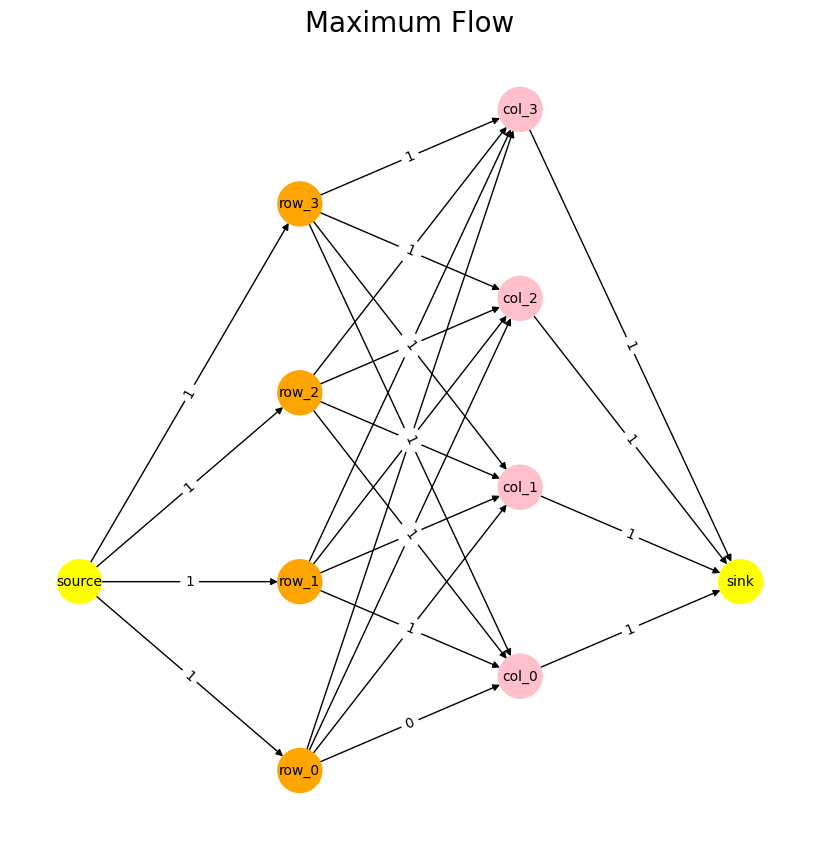

In [ ]:
# Crear el gráfico de la grilla y organizar los nodos en 4 columnas
pos = {}
node_list = list(G.nodes())
for i, node in enumerate(node_list):
    if node == 'source':
        pos[node] = (0, N/2)
    elif node == 'sink':
        pos[node] = (3, N/2)
    elif node.startswith('row'):
        pos[node] = (1, i)
    elif node.startswith('col'):
        pos[node] = (2, i)

# Dibujar el grafo organizado en 4 columnas
plt.figure(figsize=(8, 8))
colors = ['orange' if node.startswith('row') else ('pink' if node.startswith('col') else 'yellow') for node in node_list]
nx.draw(G,
        pos,
        with_labels=True,
        node_size=1000,
        node_color=colors,
        font_size=10,
        font_color='black'
        )

# Agregar etiquetas de capacidad a las aristas
edge_labels = {(u, v): G[u][v]['capacity'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo
plt.axis('off')
plt.title('Grafo Maximum Flow', fontsize=20)
plt.show()

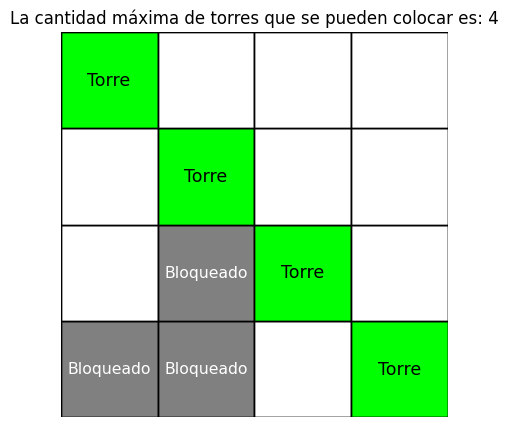

In [ ]:
# Definir el diccionario de colores
color_dict = {
    'white': (1.0, 1.0, 1.0),   # Color blanco (1, 1, 1)
    'gray': (0.5, 0.5, 0.5),    # Color gris (0.5, 0.5, 0.5)
    'green': (0.0, 1.0, 0.0),   # Color verde (0, 1, 0)
    'black': (0.0, 0.0, 0.0)    # Color negro (0, 0, 0)
}

# Crear una grilla NxN con todas las casillas en blanco
grid = [['white' for _ in range(N)] for _ in range(N)]

# Colorear las casillas inhabilitadas en gris
for row, col in unusable_cells:
    grid[row][col] = 'gray'

# Recorrer los nodos de fila y columna y colorear las casillas con torres en verde
for row_node, col_dict in flow_dict.items():
    if row_node.startswith('row'):
        for col_node, flow in col_dict.items():
            if col_node.startswith('col') and flow == 1:
                row_idx = int(row_node.split('_')[1]) # Fila donde hay torre
                col_idx = int(col_node.split('_')[1]) # Columna donde hay torre
                grid[row_idx][col_idx] = 'green'

# Tamaño de cada cuadrado en la grilla
square_size = 1.0 / N

# Dibujar la grilla con bordes negros
plt.figure(figsize=(5, 5))
ax = plt.gca()
for i in range(N + 1):
    ax.axhline(i * square_size, color='black', linewidth=1)
    ax.axvline(i * square_size, color='black', linewidth=1)

# Colorear las casillas y agregar texto personalizado
for i in range(N):
    for j in range(N):
        color = color_dict[grid[i][j]]
        ax.add_patch(plt.Rectangle((j * square_size, i * square_size), square_size, square_size, facecolor=color, edgecolor='black'))

        # Agregar texto personalizado
        if grid[i][j] == 'green':
            ax.text((j + 0.5) * square_size, (i + 0.5) * square_size, 'Torre', color='black', ha='center', va='center', fontsize=50/N)
        elif grid[i][j] == 'gray':
            ax.text((j + 0.5) * square_size, (i + 0.5) * square_size, 'Bloqueado', color='white', ha='center', va='center', fontsize=45/N)


plt.axis('off')
plt.title(f"La cantidad máxima de torres que se pueden colocar es: {max_towers}")
plt.show()


In [ ]:
flow_dict

{'row_0': {'col_0': 0, 'col_1': 0, 'col_2': 0, 'col_3': 1},
 'col_0': {'sink': 1},
 'row_1': {'col_0': 0, 'col_1': 0, 'col_2': 1, 'col_3': 0},
 'col_1': {'sink': 1},
 'row_2': {'col_0': 0, 'col_1': 1, 'col_2': 0, 'col_3': 0},
 'col_2': {'sink': 1},
 'row_3': {'col_0': 1, 'col_1': 0, 'col_2': 0, 'col_3': 0},
 'col_3': {'sink': 1},
 'source': {'row_0': 1, 'row_1': 1, 'row_2': 1, 'row_3': 1},
 'sink': {}}

In [ ]:
unusable_cells

[(0, 0), (0, 1), (1, 1)]